round.(pdf.(Poisson(0.25), 0:5); digits = 4) = [0.7788, 0.1947, 0.0243, 0.002, 0.0001, 0.0]


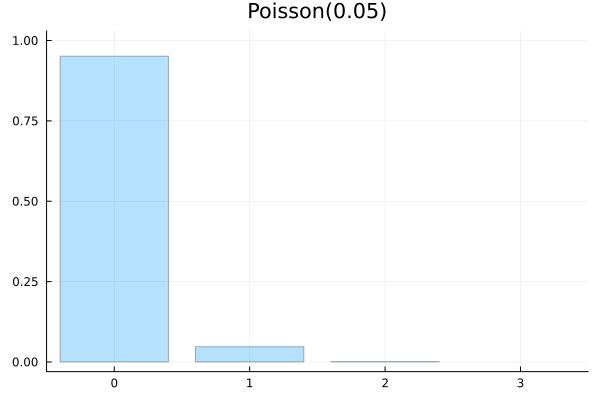

In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

@show round.(pdf.(Poisson(0.25), 0:5); digits=4)
bar(Poisson(0.05); alpha=0.3, label="", title="Poisson(0.05)")
plot!(xlim=(-0.5, 3.5), ylim=(-0.03, 1.03))

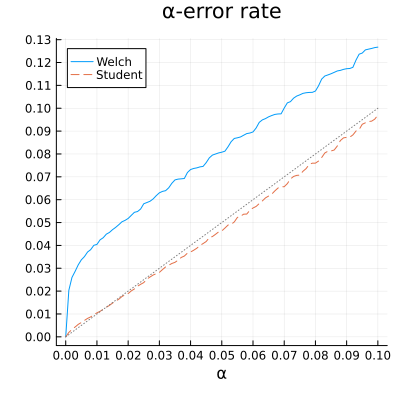

In [2]:
using Distributions
using HypothesisTests
using Random
using StatsPlots
default(fmt=:png)

ecdf_count(A, x) = count(≤(x), A)/length(A)

function sim(distx, m, disty, n; L=10^6)
    pval_welch = zeros(L)
    pval_student = zeros(L)
    Xtmp = zeros(eltype(distx), m)
    Ytmp = zeros(eltype(disty), n)
    for i in 1:L
        X = rand!(distx, Xtmp)
        Y = rand!(disty, Ytmp)
        pval_welch[i] = pvalue(UnequalVarianceTTest(X, Y))
        pval_student[i] = pvalue(EqualVarianceTTest(X, Y))
    end
    pval_welch, pval_student
end

distx = Poisson(0.05)
disty = Poisson(0.05)
m, n = 900, 100
pval_welch, pval_student = sim(distx, m, disty, n; L=10^5)
αs = 0:0.001:0.1
plot(αs, α -> ecdf_count(pval_welch, α); label="Welch")
plot!(αs, α -> ecdf_count(pval_student, α); label="Student", ls=:dash)
plot!(identity; label="", c=:grey, ls=:dot)
title!("α-error rate", xguide="α")
plot!(xtick=0:0.01:1, ytick=:0:0.01:1, size=(400, 400), leftmargin=4Plots.mm)

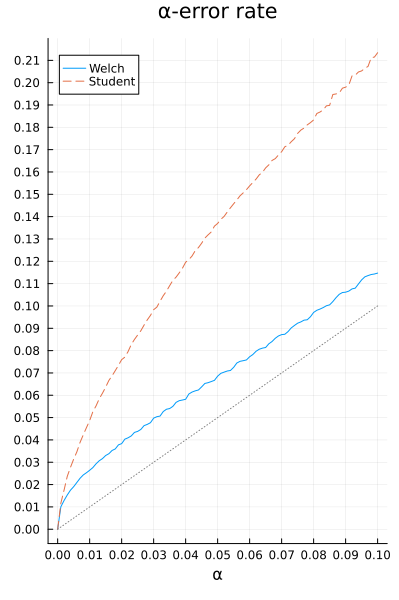

In [3]:
using Distributions
using HypothesisTests
using Random
using StatsPlots
default(fmt=:png)

ecdf_count(A, x) = count(≤(x), A)/length(A)

function sim(distx, m, disty, n; L=10^6)
    pval_welch = zeros(L)
    pval_student = zeros(L)
    Xtmp = zeros(eltype(distx), m)
    Ytmp = zeros(eltype(disty), n)
    for i in 1:L
        X = rand!(distx, Xtmp)
        Y = rand!(disty, Ytmp)
        pval_welch[i] = pvalue(UnequalVarianceTTest(X, Y))
        pval_student[i] = pvalue(EqualVarianceTTest(X, Y))
    end
    pval_welch, pval_student
end

distx = Poisson(0.05) + 0.05
disty = Poisson(0.10)
m, n = 900, 100
pval_welch, pval_student = sim(distx, m, disty, n; L=10^5)
αs = 0:0.001:0.1
plot(αs, α -> ecdf_count(pval_welch, α); label="Welch")
plot!(αs, α -> ecdf_count(pval_student, α); label="Student", ls=:dash)
plot!(identity; label="", c=:grey, ls=:dot)
title!("α-error rate", xguide="α")
plot!(xtick=0:0.01:1, ytick=:0:0.01:1, size=(400, 600), leftmargin=4Plots.mm)